In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
model = Sequential()

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))


model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
opt = tensorflow.optimizers.Adam(learning_rate = 0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
batch_size = 32 
num_classes = 10
epochs = 100
data_augmentation = True

In [8]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True, callbacks=[tbCallBack])
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    
    datagen.fit(x_train)

    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test), callbacks=[tbCallBack])

Using real-time data augmentation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
1562/1562 [==============================] - 42s 20ms/step - loss: 2.0294 - accuracy: 0.2320 - val_loss: 1.7548 - val_accuracy: 0.3616
Epoch 2/100
1562/1562 [==============================] - 29s 19ms/step - loss: 1.7535 - accuracy: 0.3464 - val_loss: 1.5949 - val_accuracy: 0.4118
Epoch 3/100
1562/1562 [==============================] - 29s 19ms/step - loss: 1.6338 - accuracy: 0.3963 - val_loss: 1.4990 - val_accuracy: 0.4521
Epoch 4/100
1562/1562 [==============================] - 34s 21ms/step - loss: 1.5527 - accuracy: 0.4288 - val_loss: 1.4399 - val_accuracy: 0.4705
Epoch 5/100
1562/1562 [==============================] - 29s 18ms/step - loss: 1.4944 - accuracy: 0.4537 - val_loss: 1.4188 - val_accuracy: 0.4778
Epoch 6/100
1562/1562 [==============================] - 29s 19ms/step - loss: 1.4415 - accuracy: 0.4733 - val_loss: 1.3520 - val_accuracy: 0.5094
Epoch 7/100
1562/1562 [==============================] - 29s 18ms/step - loss: 1.3938 - accuracy: 0.4942 - val_loss: 1

In [65]:
hist = model.save('/content/drive/MyDrive/image_model2.h5')

In [10]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.5609 - accuracy: 0.8086
Test Loss 0.5609250664710999
Test Accuracy 0.8086000084877014


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
import matplotlib.pyplot as plt

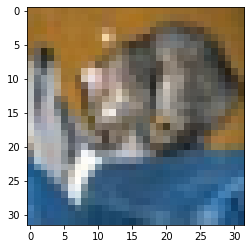

In [15]:
plt.imshow(x_test[0])

In [22]:
model.predict(x_test[[4]])

In [90]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

# Labels of the CIFAR 10 dataset
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()


filename= '/content/car.jpeg'


def load_image(filename):
	
	img = image.load_img(filename, target_size=(32, 32))
	
	img = img_to_array(img)
	
	img = img.reshape(1, 32, 32, 3)
	
	img = img.astype('float32')
	img = img / 255.0
	return img
 

def run_example():
	
	img = load_image(filename)
	
	model = load_model('/content/drive/MyDrive/image_model2.h5')
	
	result = labels[model.predict(img).argmax()]
	print(result)
  
run_example()

automobile
